In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\ReadyAssist Assessment\Assessment\Datasets\GUIDE_Train.csv')

In [3]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
import sys
sys.path.append(r"C:\Users\Lenovo\Desktop\ReadyAssist Assessment\Assessment")

from methods import preprocessing

In [5]:
# we will be removing all the columns which are having less values than the number of unique values in our target variable 
df.nunique().values
# also we can see that only 1 column has less than 3 unique values, we can remove it manually as well, but to have a dedicated logic serves us better

array([ 730778,    5769,  466151, 1265644,  760944,    8428,   86149,
            20,    1193,       3,       3,      16,      33,       2,
         75826,  106416,  285957,  123252,  358401,  530183,  343516,
        368250,  114541,  375196,   26474,    1341,     525,     699,
          1728,    2681,     703,    1745,  222085,   87832,    2309,
            25,      10,       6,      58,       5,       2,       5,
           236,    1368,    9342], dtype=int64)

In [6]:
# we are removing all the columns which have more than 50% null values and the columns with less than 3 uniques values
df.drop(preprocessing.null_columns_remover(df, threshold=0.5), axis=1,inplace=True)
df.drop(preprocessing.NoVariaton_columns_remover(df,threshold=3),axis=1,inplace=True)

In [7]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,TruePositive,CloudLogonRequest,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,BenignPositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [8]:
df.dropna(inplace=True)
#the only column left with missing values was our target column, and with only 51,000 null values it was advisable to drop it

In [9]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,TruePositive,CloudLogonRequest,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,BenignPositive,MailMessage,...,3421,881,289573,117668,3586,5,66,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,BenignPositive,Ip,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [10]:
df=preprocessing.convert_to_datetime(df=df)

In [11]:
df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,DeviceId,...,OSFamily,OSVersion,CountryCode,State,City,day,month,year,hour,weekday
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,98799,...,5,66,31,6,3,4,6,2024,6,1
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,98799,...,5,66,242,1445,10630,14,6,2024,3,4
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,98799,...,5,66,242,1445,10630,13,6,2024,4,3
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,98799,...,5,66,242,1445,10630,10,6,2024,16,0
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,98799,...,5,66,242,1445,10630,15,6,2024,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,InitialAccess,TruePositive,CloudLogonRequest,98799,...,5,66,242,1445,10630,8,6,2024,15,5
9516833,1228360650033,59,196410,748366,2,2,CommandAndControl,BenignPositive,Url,98799,...,5,66,242,1445,10630,6,6,2024,9,3
9516834,867583395122,44,14117,7425,78,57,Exfiltration,BenignPositive,MailMessage,98799,...,5,66,242,1445,10630,11,6,2024,22,1
9516835,395136991850,43,644,8973,52,10,Impact,BenignPositive,Ip,98799,...,5,66,242,1445,10630,20,5,2024,23,0


In [12]:
print(df.head(5))

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType  DeviceId  ...  OSFamily  \
0      InitialAccess    TruePositive         Ip     98799  ...         5   
1       Exfiltration   FalsePositive       User     98799  ...         5   
2      InitialAccess   FalsePositive        Url     98799  ...         5   
3  CommandAndControl  BenignPositive        Url     98799  ...         5   
4          Execution    TruePositive       User     98799  ...         5   

   OSVersion  CountryCode  State   City  day  month  year  hour  weekday  
0         66           31      6   

In [13]:
print(df.columns)

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath',
       'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State',
       'City', 'day', 'month', 'year', 'hour', 'weekday'],
      dtype='object')


# From this point onwards, we are done with the preprocessing of Data, not entirely but mostly
## We still will remove columns which are highly correlated with each other, but that will be done after EDA

### EDA Steps:
1. **Data Overview**:
    - Understand the structure of the dataset, including the number of rows, columns, and data types.
    - Check for missing values and their distribution.

2. **Univariate Analysis**:
    - Analyze the distribution of individual features using histograms, box plots, and count plots for categorical variables.

3. **Bivariate Analysis**:
    - Explore relationships between features and the target variable using scatter plots, bar plots, and correlation matrices.

4. **Correlation Analysis**:
    - Identify highly correlated features using a heatmap and remove redundant columns to reduce multicollinearity.

5. **Outlier Detection**:
    - Detect and handle outliers using statistical methods like IQR or visualization techniques like box plots.

6. **Feature Engineering**:
    - Create new features if necessary, based on domain knowledge or patterns observed during EDA.

7. **Visualization**:
    - Use advanced visualization techniques (e.g., pair plots, violin plots) to gain deeper insights into the data.

8. **Insights and Observations**:
    - Summarize key findings and patterns observed during the EDA process.

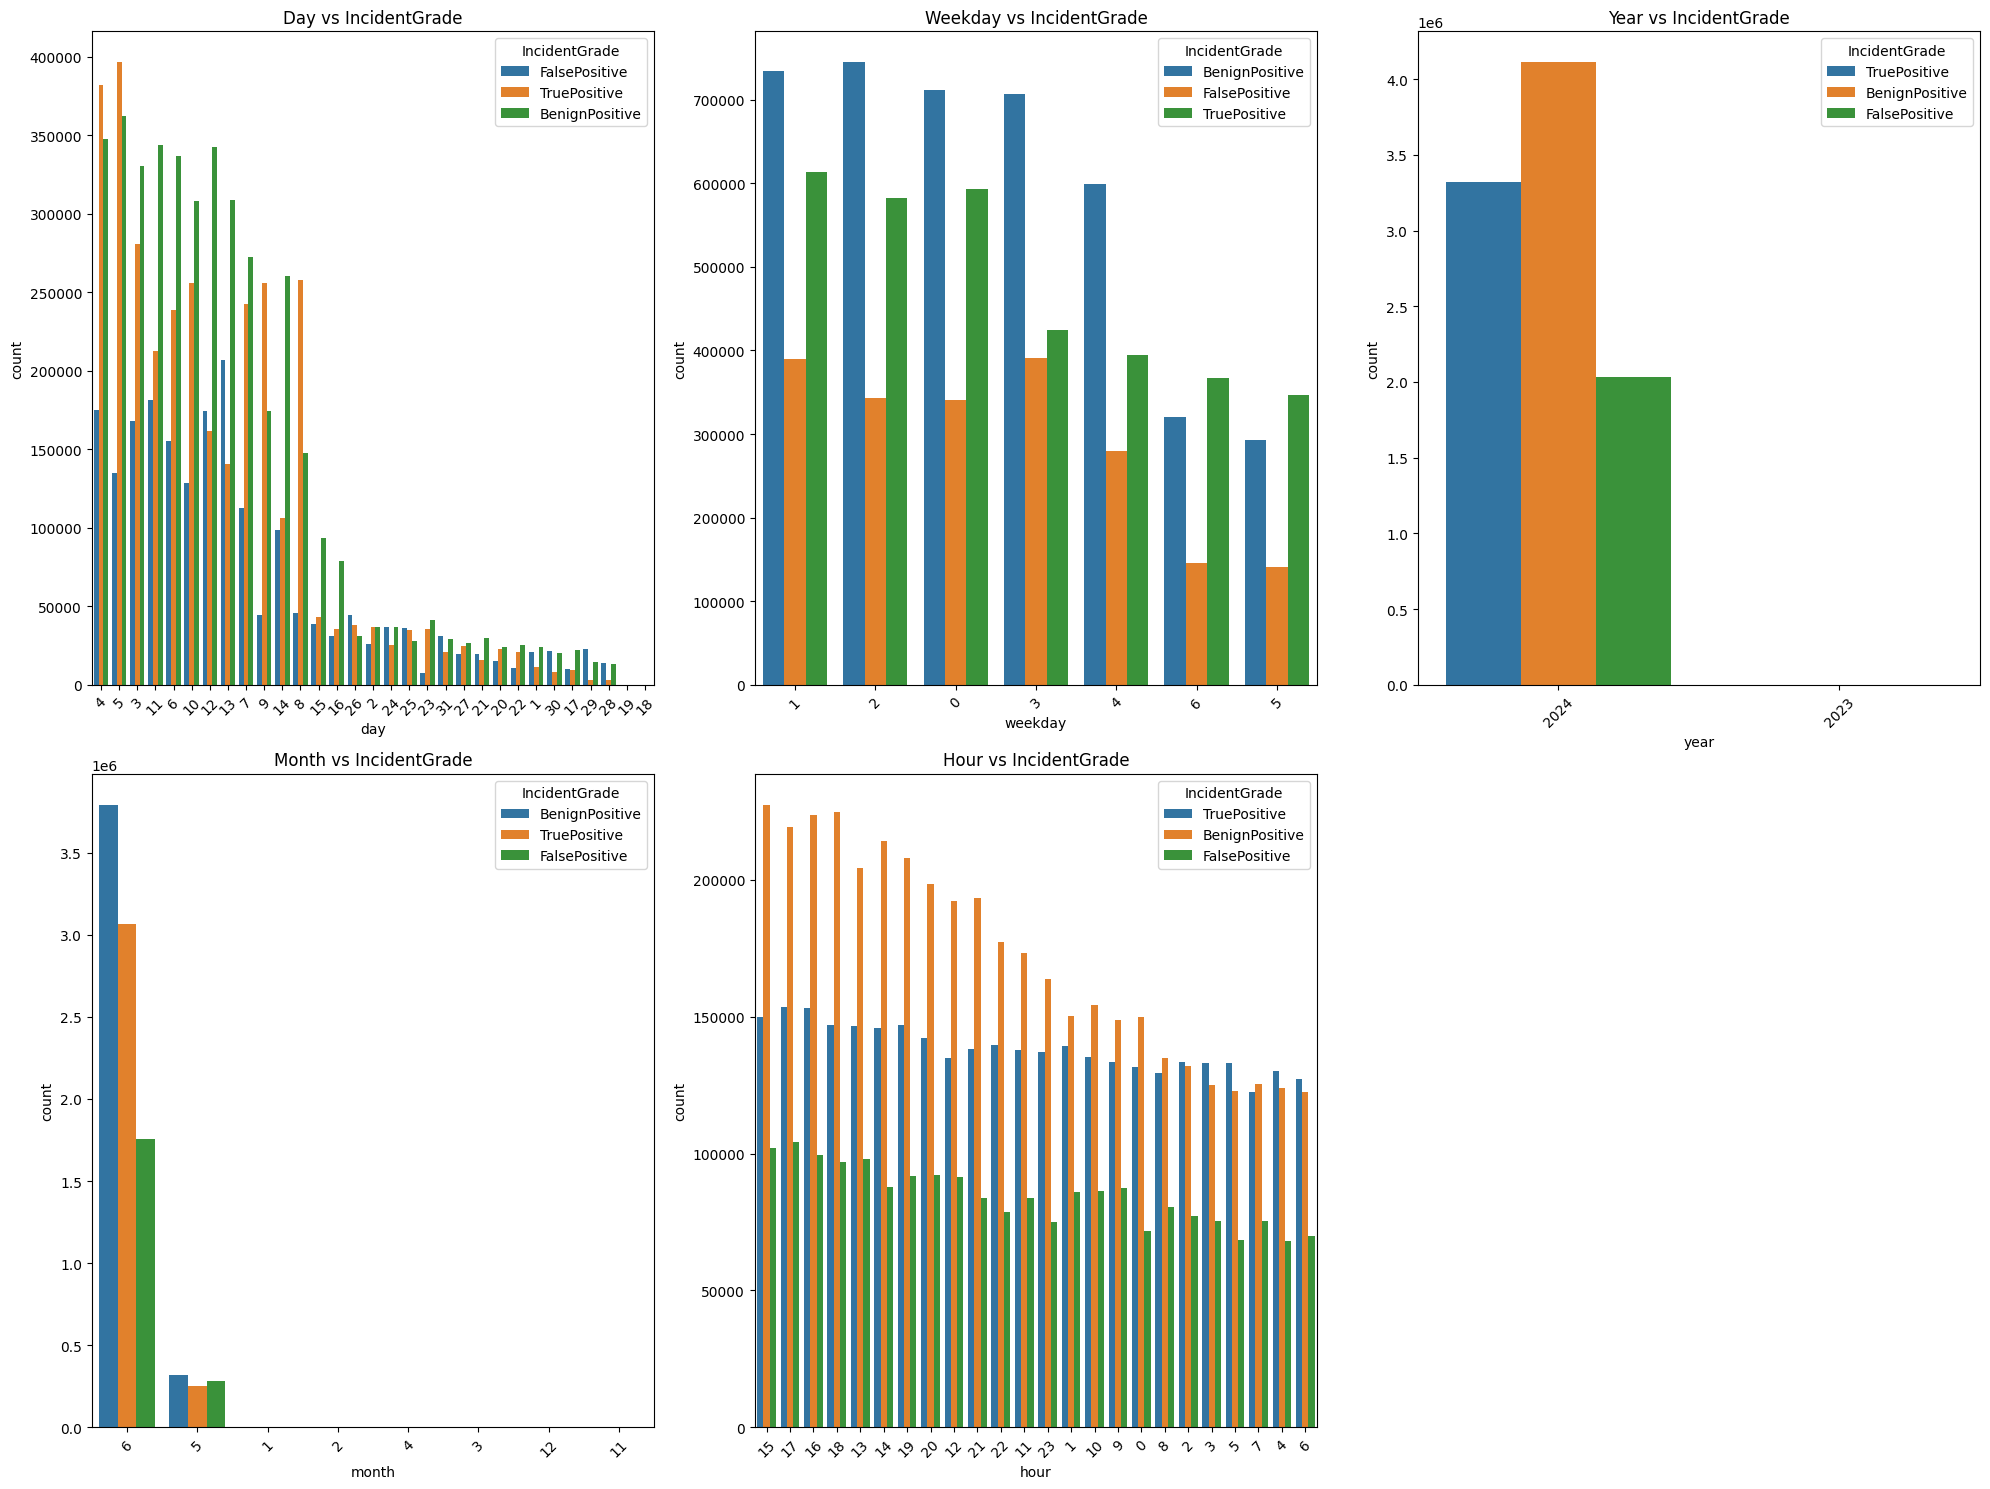

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of time-related features to plot
time_features = ['day', 'weekday', 'year', 'month', 'hour']

# Set the size of the plots for better visualization
plt.figure(figsize=(20, 15))

# Loop through each time-related feature and create a side-by-side bar plot for each 'IncidentGrade'
for i, feature in enumerate(time_features, 1):
    plt.subplot(2, 3, i)  # Create subplots in a 2x3 grid
    sns.countplot(x=feature, hue='IncidentGrade', data=df, order=df[feature].value_counts().index)
    plt.title(f'{feature.capitalize()} vs IncidentGrade')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# TimeStamp analysis

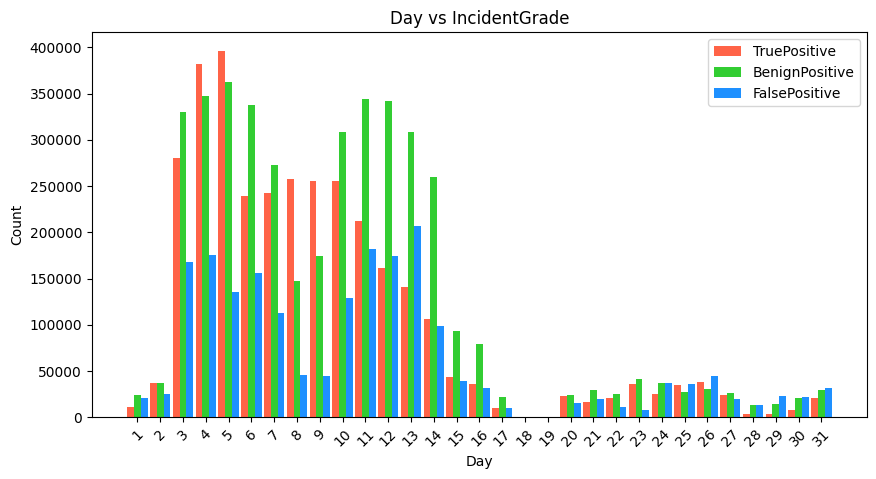

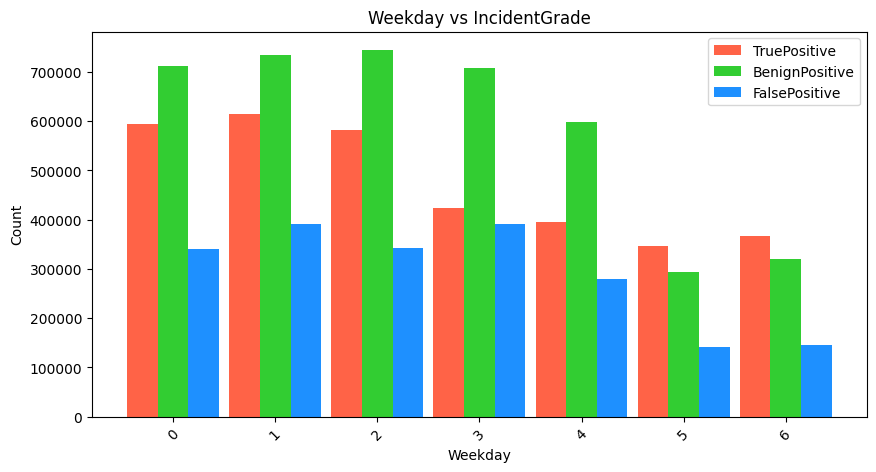

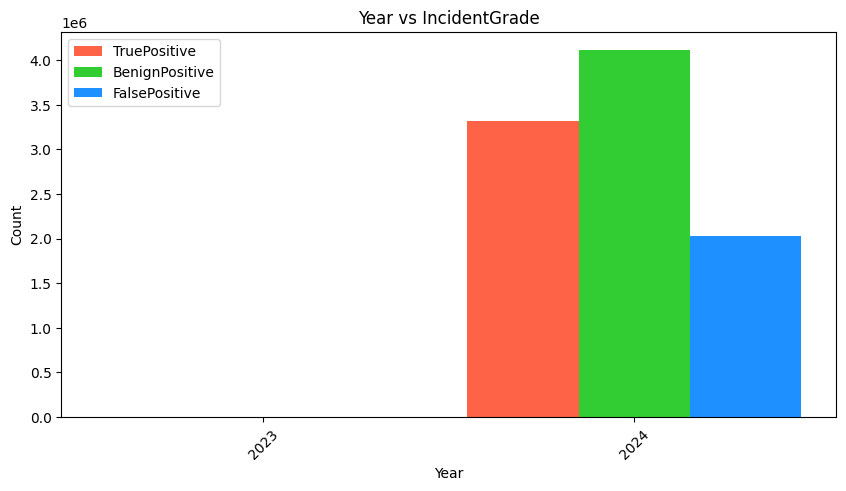

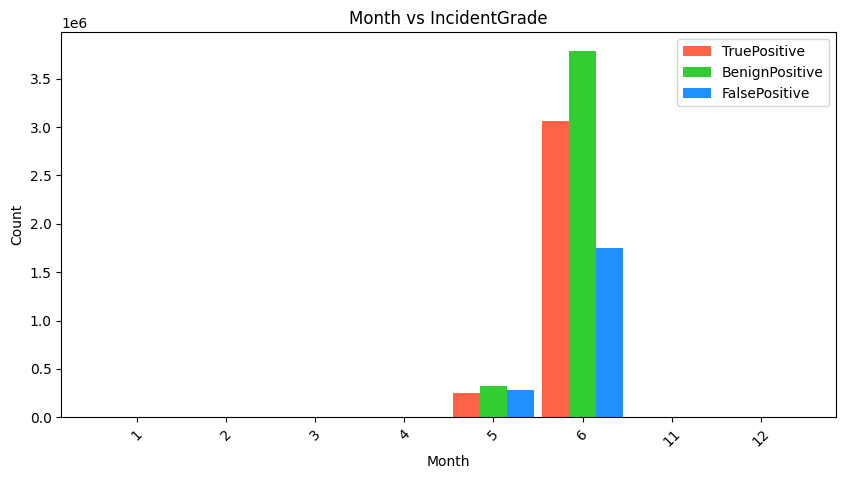

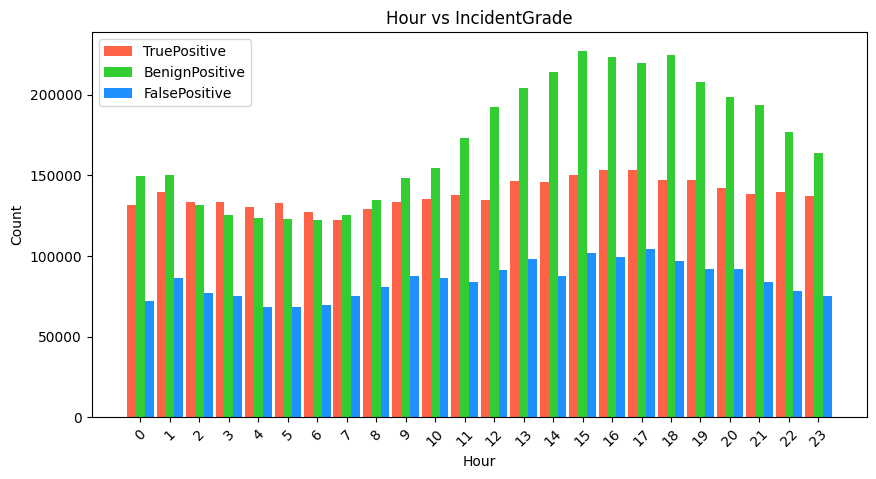

In [15]:


# Define the time-related features you want to analyze
time_features = ['day', 'weekday', 'year', 'month', 'hour']

# Define colors for each incident grade
colors = {'TruePositive': '#FF6347', 
          'BenignPositive': '#32CD32',  
          'FalsePositive': '#1E90FF'}  

# Loop through each time feature and create a bar plot for each
for feature in time_features:
    plt.figure(figsize=(10,5))
    # Calculate the value counts for each IncidentGrade for the current feature
    count_by_grade = df.groupby([feature, 'IncidentGrade']).size().unstack(fill_value=0)
    
    # Get the x positions for the bars (shifted for side-by-side bars)
    x = np.arange(len(count_by_grade))
    
    # Width of the bars
    width = 0.3

    # Plot the bars for each 'IncidentGrade'
    plt.bar(x - width, count_by_grade['TruePositive'], width, label='TruePositive', color=colors['TruePositive'])
    plt.bar(x, count_by_grade['BenignPositive'], width, label='BenignPositive', color=colors['BenignPositive'])
    plt.bar(x + width, count_by_grade['FalsePositive'], width, label='FalsePositive', color=colors['FalsePositive'])
    
    # Customize the plot
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.title(f'{feature.capitalize()} vs IncidentGrade')
    plt.xticks(x, count_by_grade.index, rotation=45)  # Set x-ticks as the unique values of the feature
    plt.legend()

    # Display the plot
    plt.show()


# Key Observations (Time-Stamps)

## Year
- The data only two years, that too most of the data, nearly all of it, falling in the year 2024.
- Incident grades such as `TruePositive`, `BenignPositive`, and `FalsePositive` show varying distributions across years.
- Overall we are not able to see the graph of the final year

## Month
- Most of the Cyber-Crime incidents take place in the month of May and June, with some months with no Crimes.
- For example, May and June show high spikes because they are the implimentation beginning months after financial year start.
- Comparing incident grades across months can help identify patterns in malicious activities.

## Hour
- Incident activity varies significantly by hour, with certain hours (late night) showing higher activity.
- `TruePositive` and `BenignPositive` incidents are more frequent during specific hours, indicating targeted attacks during those times.
- Understanding hourly trends can help in resource allocation for monitoring and response.

## Day
- Daily trends reveal fluctuations in incident counts, with some days showing higher activity.
- We do observe a trend that most of the attacks threatning and non-threatning alike, occur in the first half of the month.
- Analyzing daily patterns can help identify specific days prone to incidents, such as weekends or weekdays.

## Day of the Week
- Incident distribution across weekdays highlights potential patterns, such as increased activity on weekdays versus weekends.
- `BenignPositive` and `TruePositive`is higher during the weekdays due to more official work taking place on those days

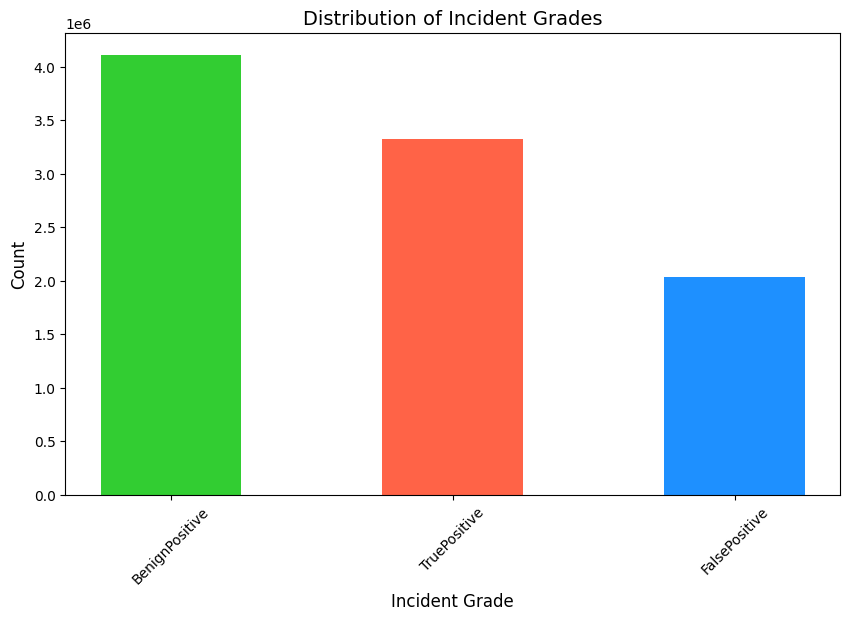

In [16]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Create a bar plot for the count of each IncidentGrade
plt.bar(
    x=df['IncidentGrade'].value_counts().index,  # IncidentGrade categories
    height=df['IncidentGrade'].value_counts().values,  # Counts of each category
    color=[colors[grade] for grade in df['IncidentGrade'].value_counts().index],  # Use colors from the 'colors' dictionary
    width=0.5  # Set the width of the bars
)

# Add labels and title for better readability
plt.xlabel('Incident Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Incident Grades', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Distribution of Target column
### **The above figure shows the distribution of the categories for prediction**

### Distribution of Category
**Why**:

- **Visualize the distribution of different categories in the dataset to identify which types of cybersecurity incidents are most prevalent.**

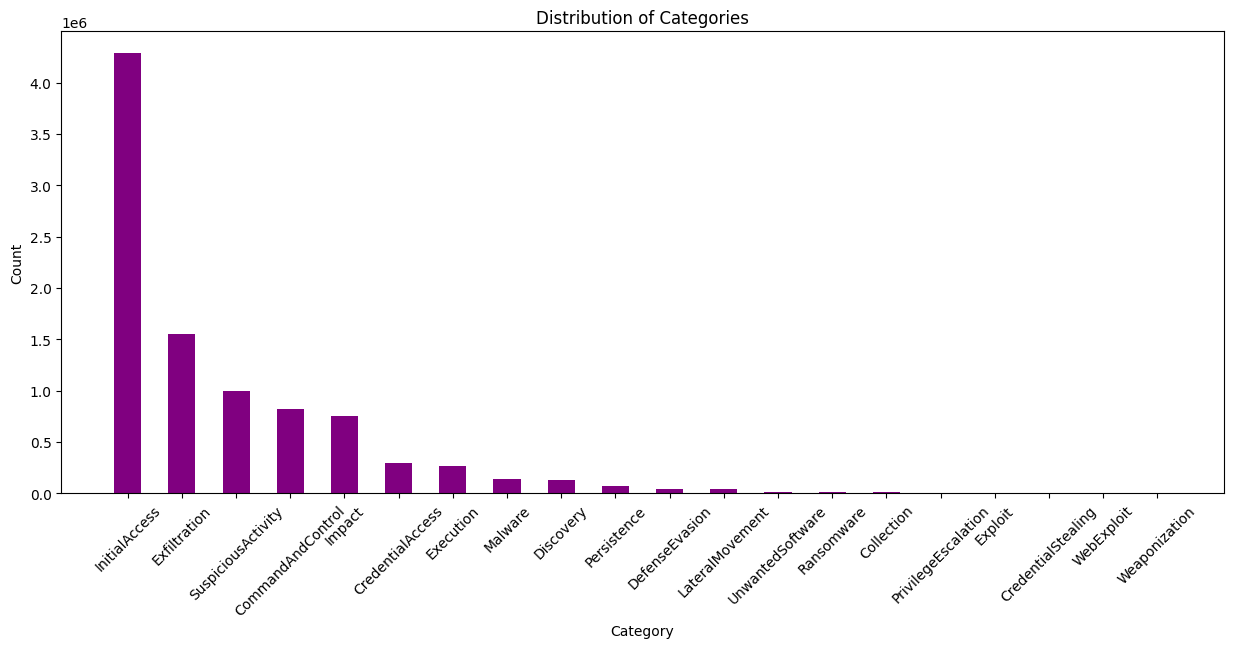

In [17]:
plt.figure(figsize=(15, 6))
category_counts = df['Category'].value_counts()
plt.bar(x=category_counts.index, height=category_counts.values, color='purple', width=0.5)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45)
plt.show()

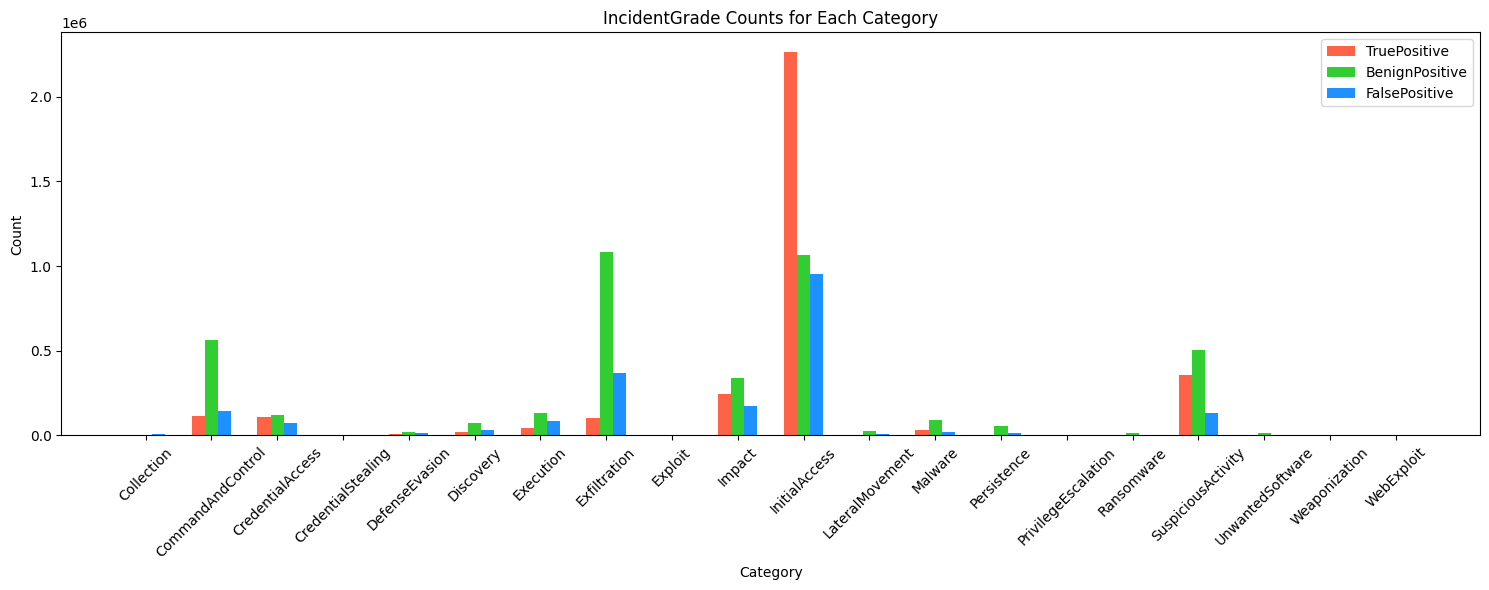

In [18]:
# Pivot the data to get counts of IncidentGrade for each Category
category_grade_counts = df.groupby(['Category', 'IncidentGrade']).size().unstack(fill_value=0)

# Define the x positions for the bars
x = np.arange(len(category_grade_counts))

# Define the width of the bars
width = 0.2

# Create the plot
plt.figure(figsize=(15, 6))

# Plot bars for each IncidentGrade
plt.bar(x - width, category_grade_counts['TruePositive'], width, label='TruePositive', color=colors['TruePositive'])
plt.bar(x, category_grade_counts['BenignPositive'], width, label='BenignPositive', color=colors['BenignPositive'])
plt.bar(x + width, category_grade_counts['FalsePositive'], width, label='FalsePositive', color=colors['FalsePositive'])

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('IncidentGrade Counts for Each Category')
plt.xticks(x, category_grade_counts.index, rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Incident Data Overview

## Distribution of Categories

The first bar chart shows the count of incidents per category:

- **InitialAccess** dominates with over 4 million incidents, followed by **Exfiltration**, **SuspiciousActivity**, and **CommandAndControl**.
- Categories like **Weaponization**, **WebExploit**, and **CredentialStealing** have very low incident counts.

**Insight**: The data is highly imbalanced, indicating that most incidents are concentrated in a few critical categories.

---

## IncidentGrade Breakdown per Category

The second chart displays the counts of **TruePositive**, **BenignPositive**, and **FalsePositive** for each category:

- **InitialAccess** shows a high number of **TruePositives**, suggesting strong threat detection.
- **CommandAndControl**, **Exfiltration**, and **SuspiciousActivity** show significant **BenignPositive** and **FalsePositive** counts, highlighting areas with detection noise.

**Insight**: Categories with higher **FalsePositives** may require improved tuning or threat modeling.

---

## Key Takeaways

1. **Emphasize detection and response efforts around InitialAccess.**
2. **Investigate and refine detection strategies for CommandAndControl and SuspiciousActivity to reduce false alarms.**

In [19]:
# Find non-numerical columns
non_numerical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numerical columns are:")
print(non_numerical_cols)


Non-numerical columns are:
['Category', 'IncidentGrade', 'EntityType']


# Non-numerical columns
- **The non-numerical columns are**: `Category`, `IncidentGrade`, `EntityType`

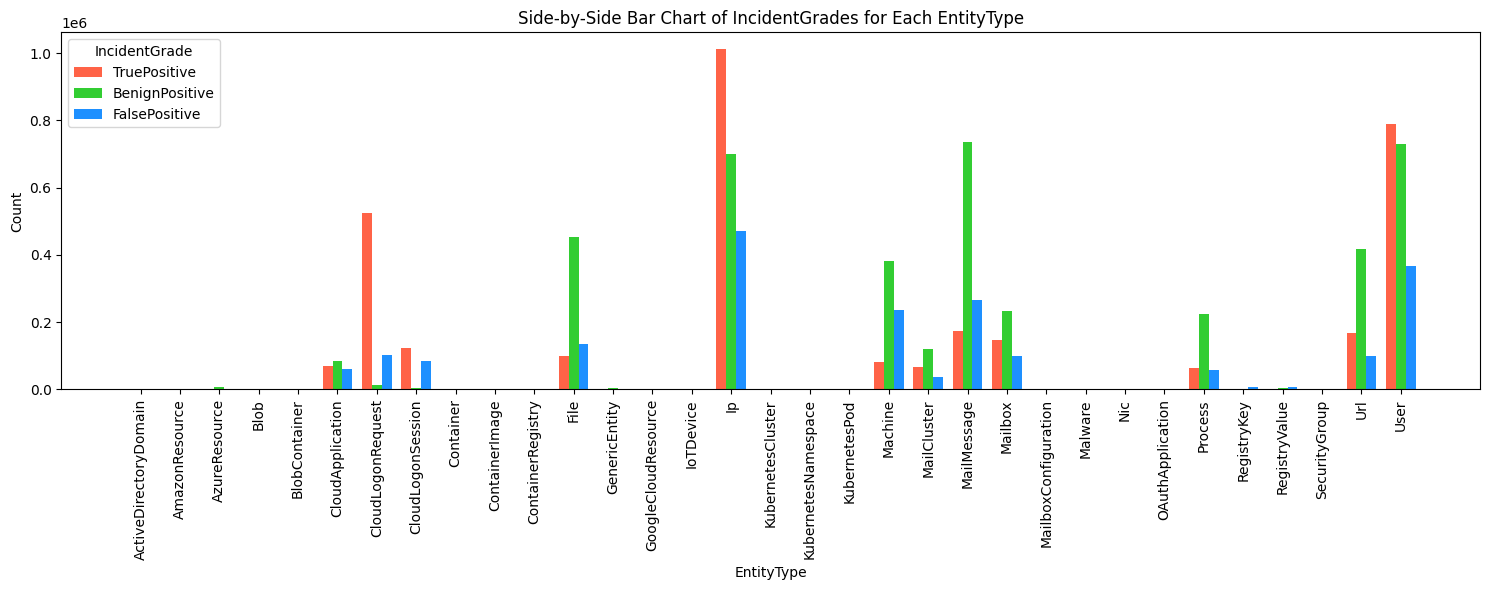

In [20]:
# Pivot the data to get counts of IncidentGrade for each EntityType
entity_grade_counts = df.groupby(['EntityType', 'IncidentGrade']).size().unstack(fill_value=0)

# Define the colors for each IncidentGrade
colors = {'TruePositive': '#FF6347', 'BenignPositive': '#32CD32', 'FalsePositive': '#1E90FF'}

# Define the x positions for the bars
x = np.arange(len(entity_grade_counts))

# Define the width of the bars
width = 0.25

# Create the plot
plt.figure(figsize=(15, 6))

# Plot bars for each IncidentGrade
plt.bar(x - width, entity_grade_counts['TruePositive'], width, label='TruePositive', color=colors['TruePositive'])
plt.bar(x, entity_grade_counts['BenignPositive'], width, label='BenignPositive', color=colors['BenignPositive'])
plt.bar(x + width, entity_grade_counts['FalsePositive'], width, label='FalsePositive', color=colors['FalsePositive'])

# Customize the plot
plt.xlabel('EntityType')
plt.ylabel('Count')
plt.title('Side-by-Side Bar Chart of IncidentGrades for Each EntityType')
plt.xticks(x, entity_grade_counts.index, rotation=90)  # Rotate x-axis labels vertically
plt.legend(title='IncidentGrade')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [21]:
custom_encoding = {}
for entity, row in entity_grade_counts.iterrows():
    total = row.sum()
    true_positive_percentage = row['TruePositive'] / total if total > 0 else 0
    false_positive_percentage = row['FalsePositive'] / total if total > 0 else 0
    benign_positive_percentage = row['BenignPositive'] / total if total > 0 else 0

    # Assign scores based on the percentages
    if true_positive_percentage > 0.6:
        custom_encoding[entity] = 3  # High score for high TruePositive percentage
    elif benign_positive_percentage > 0.6:
        custom_encoding[entity] = 2  # Moderate score for high BenignPositive percentage
    elif false_positive_percentage > 0.6:
        custom_encoding[entity] = 0  # Lowest score for high FalsePositive percentage
    else:
        custom_encoding[entity] = 1  # Default moderate score

print("Custom Encoding Dictionary:")
print(custom_encoding)

Custom Encoding Dictionary:
{'ActiveDirectoryDomain': 0, 'AmazonResource': 2, 'AzureResource': 2, 'Blob': 0, 'BlobContainer': 0, 'CloudApplication': 1, 'CloudLogonRequest': 3, 'CloudLogonSession': 1, 'Container': 1, 'ContainerImage': 1, 'ContainerRegistry': 1, 'File': 2, 'GenericEntity': 2, 'GoogleCloudResource': 0, 'IoTDevice': 3, 'Ip': 1, 'KubernetesCluster': 1, 'KubernetesNamespace': 1, 'KubernetesPod': 1, 'Machine': 1, 'MailCluster': 1, 'MailMessage': 2, 'Mailbox': 1, 'MailboxConfiguration': 1, 'Malware': 1, 'Nic': 3, 'OAuthApplication': 1, 'Process': 2, 'RegistryKey': 0, 'RegistryValue': 0, 'SecurityGroup': 0, 'Url': 2, 'User': 1}


In [22]:
category_encoding = {}
for category, row in category_grade_counts.iterrows():
    total = row.sum()
    true_positive_percentage = row['TruePositive'] / total if total > 0 else 0
    false_positive_percentage = row['FalsePositive'] / total if total > 0 else 0
    benign_positive_percentage = row['BenignPositive'] / total if total > 0 else 0

    # Assign scores based on the percentages
    if true_positive_percentage > 0.6:
        category_encoding[category] = 3  # High score for high TruePositive percentage
    elif benign_positive_percentage > 0.6:
        category_encoding[category] = 2  # Moderate score for high BenignPositive percentage
    elif false_positive_percentage > 0.6:
        category_encoding[category] = 0  # Lowest score for high FalsePositive percentage
    else:
        category_encoding[category] = 1  # Default moderate score

print("Category Encoding Dictionary:")
print(category_encoding)

Category Encoding Dictionary:
{'Collection': 1, 'CommandAndControl': 2, 'CredentialAccess': 1, 'CredentialStealing': 0, 'DefenseEvasion': 1, 'Discovery': 1, 'Execution': 1, 'Exfiltration': 2, 'Exploit': 1, 'Impact': 1, 'InitialAccess': 1, 'LateralMovement': 2, 'Malware': 2, 'Persistence': 2, 'PrivilegeEscalation': 2, 'Ransomware': 2, 'SuspiciousActivity': 1, 'UnwantedSoftware': 2, 'Weaponization': 3, 'WebExploit': 2}


# Custom Encoding for EntityType and Category

## EntityType Encoding
The `custom_encoding` dictionary for `EntityType` is created based on the percentage of `TruePositive`, `BenignPositive`, and `FalsePositive` incidents for each entity type. The encoding assigns scores as follows:
- **3**: High `TruePositive` percentage (> 60%).
- **2**: High `BenignPositive` percentage (> 60%).
- **0**: High `FalsePositive` percentage (> 60%).
- **1**: Default moderate score for other cases.

This encoding helps prioritize entities with higher `TruePositive` rates while identifying those with significant noise (`FalsePositive`).

## Category Encoding
Similarly, the `category_encoding` dictionary is created for `Category` using the same logic. Categories with higher `TruePositive` percentages are given higher scores, while those with higher `FalsePositive` percentages are assigned lower scores.

### Purpose
These encodings are useful for:
- **Feature Engineering**: Incorporating encoded values into machine learning models.
- **Prioritization**: Identifying critical entities and categories for focused analysis.
- **Noise Reduction**: Highlighting areas with high `FalsePositive` rates for further investigation.
```

In [23]:
# Import the encoding functions
from methods.encoding import encode_category, encode_incident_grade, encode_entity

# Assuming you already have your df
# Example:
# df = pd.read_csv('your_data.csv')

# Apply encoding functions
df = encode_category(df)
df = encode_incident_grade(df)
df = encode_entity(df)

# Now df has new encoded columns:
# 'Category_encoded', 'IncidentGrade_encoded', and 'Entity_encoded'


In [24]:
df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,DeviceId,...,State,City,day,month,year,hour,weekday,Category_encoded,IncidentGrade_encoded,Entity_encoded
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,98799,...,6,3,4,6,2024,6,1,1,2,1
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,98799,...,1445,10630,14,6,2024,3,4,2,0,1
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,98799,...,1445,10630,13,6,2024,4,3,1,0,2
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,98799,...,1445,10630,10,6,2024,16,0,2,1,2
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,98799,...,1445,10630,15,6,2024,1,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,InitialAccess,TruePositive,CloudLogonRequest,98799,...,1445,10630,8,6,2024,15,5,1,2,3
9516833,1228360650033,59,196410,748366,2,2,CommandAndControl,BenignPositive,Url,98799,...,1445,10630,6,6,2024,9,3,2,1,2
9516834,867583395122,44,14117,7425,78,57,Exfiltration,BenignPositive,MailMessage,98799,...,1445,10630,11,6,2024,22,1,2,1,2
9516835,395136991850,43,644,8973,52,10,Impact,BenignPositive,Ip,98799,...,1445,10630,20,5,2024,23,0,1,1,1


In [25]:
df.drop(['IncidentGrade','Category','EntityType'],axis=1,inplace=True)

In [26]:
df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,State,City,day,month,year,hour,weekday,Category_encoded,IncidentGrade_encoded,Entity_encoded
0,180388628218,0,612,123247,7,6,98799,138268,27,160396,...,6,3,4,6,2024,6,1,1,2,1
1,455266534868,88,326,210035,58,43,98799,138268,360606,160396,...,1445,10630,14,6,2024,3,4,2,0,1
2,1056561957389,809,58352,712507,423,298,98799,138268,360606,68652,...,1445,10630,13,6,2024,4,3,1,0,2
3,1279900258736,92,32992,774301,2,2,98799,138268,360606,13,...,1445,10630,10,6,2024,16,0,2,1,2
4,214748368522,148,4359,188041,9,74,98799,138268,360606,160396,...,1445,10630,15,6,2024,1,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,98799,138268,360606,160396,...,1445,10630,8,6,2024,15,5,1,2,3
9516833,1228360650033,59,196410,748366,2,2,98799,138268,360606,164,...,1445,10630,6,6,2024,9,3,2,1,2
9516834,867583395122,44,14117,7425,78,57,98799,138268,360606,160396,...,1445,10630,11,6,2024,22,1,2,1,2
9516835,395136991850,43,644,8973,52,10,98799,138268,465,160396,...,1445,10630,20,5,2024,23,0,1,1,1


In [27]:
sys.path.append(r'C:\Users\Lenovo\Desktop\ReadyAssist Assessment\Assessment')

In [28]:
from methods import preprocessing

In [29]:
df=preprocessing.remove_highly_correlated_features(df)

In [30]:
df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,OSFamily,CountryCode,day,month,year,hour,weekday,Category_encoded,IncidentGrade_encoded,Entity_encoded
0,180388628218,0,612,123247,7,6,98799,138268,27,160396,...,5,31,4,6,2024,6,1,1,2,1
1,455266534868,88,326,210035,58,43,98799,138268,360606,160396,...,5,242,14,6,2024,3,4,2,0,1
2,1056561957389,809,58352,712507,423,298,98799,138268,360606,68652,...,5,242,13,6,2024,4,3,1,0,2
3,1279900258736,92,32992,774301,2,2,98799,138268,360606,13,...,5,242,10,6,2024,16,0,2,1,2
4,214748368522,148,4359,188041,9,74,98799,138268,360606,160396,...,5,242,15,6,2024,1,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,98799,138268,360606,160396,...,5,242,8,6,2024,15,5,1,2,3
9516833,1228360650033,59,196410,748366,2,2,98799,138268,360606,164,...,5,242,6,6,2024,9,3,2,1,2
9516834,867583395122,44,14117,7425,78,57,98799,138268,360606,160396,...,5,242,11,6,2024,22,1,2,1,2
9516835,395136991850,43,644,8973,52,10,98799,138268,465,160396,...,5,242,20,5,2024,23,0,1,1,1


In [31]:
df.iloc[:,5:]

,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,...,OSFamily,CountryCode,day,month,year,hour,weekday,Category_encoded,IncidentGrade_encoded,Entity_encoded
0,6,98799,138268,27,160396,441377,673934,153085,529644,1631,...,5,31,4,6,2024,6,1,1,2,1
1,43,98799,138268,360606,160396,22406,23032,153085,529644,1631,...,5,242,14,6,2024,3,4,2,0,1
2,298,98799,138268,360606,68652,441377,673934,153085,529644,1631,...,5,242,13,6,2024,4,3,1,0,2
3,2,98799,138268,360606,13,441377,673934,153085,529644,1631,...,5,242,10,6,2024,16,0,2,1,2
4,74,98799,138268,360606,160396,449,592,153085,529644,1631,...,5,242,15,6,2024,1,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,6,98799,138268,360606,160396,441377,673934,153085,529644,1631,...,5,242,8,6,2024,15,5,1,2,3
9516833,2,98799,138268,360606,164,441377,673934,153085,529644,1631,...,5,242,6,6,2024,9,3,2,1,2
9516834,57,98799,138268,360606,160396,441377,270,153085,22919,1631,...,5,242,11,6,2024,22,1,2,1,2
9516835,10,98799,138268,465,160396,441377,673934,153085,529644,1631,...,5,242,20,5,2024,23,0,1,1,1


In [32]:
df

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,OSFamily,CountryCode,day,month,year,hour,weekday,Category_encoded,IncidentGrade_encoded,Entity_encoded
0,180388628218,0,612,123247,7,6,98799,138268,27,160396,...,5,31,4,6,2024,6,1,1,2,1
1,455266534868,88,326,210035,58,43,98799,138268,360606,160396,...,5,242,14,6,2024,3,4,2,0,1
2,1056561957389,809,58352,712507,423,298,98799,138268,360606,68652,...,5,242,13,6,2024,4,3,1,0,2
3,1279900258736,92,32992,774301,2,2,98799,138268,360606,13,...,5,242,10,6,2024,16,0,2,1,2
4,214748368522,148,4359,188041,9,74,98799,138268,360606,160396,...,5,242,15,6,2024,1,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,7,6,98799,138268,360606,160396,...,5,242,8,6,2024,15,5,1,2,3
9516833,1228360650033,59,196410,748366,2,2,98799,138268,360606,164,...,5,242,6,6,2024,9,3,2,1,2
9516834,867583395122,44,14117,7425,78,57,98799,138268,360606,160396,...,5,242,11,6,2024,22,1,2,1,2
9516835,395136991850,43,644,8973,52,10,98799,138268,465,160396,...,5,242,20,5,2024,23,0,1,1,1


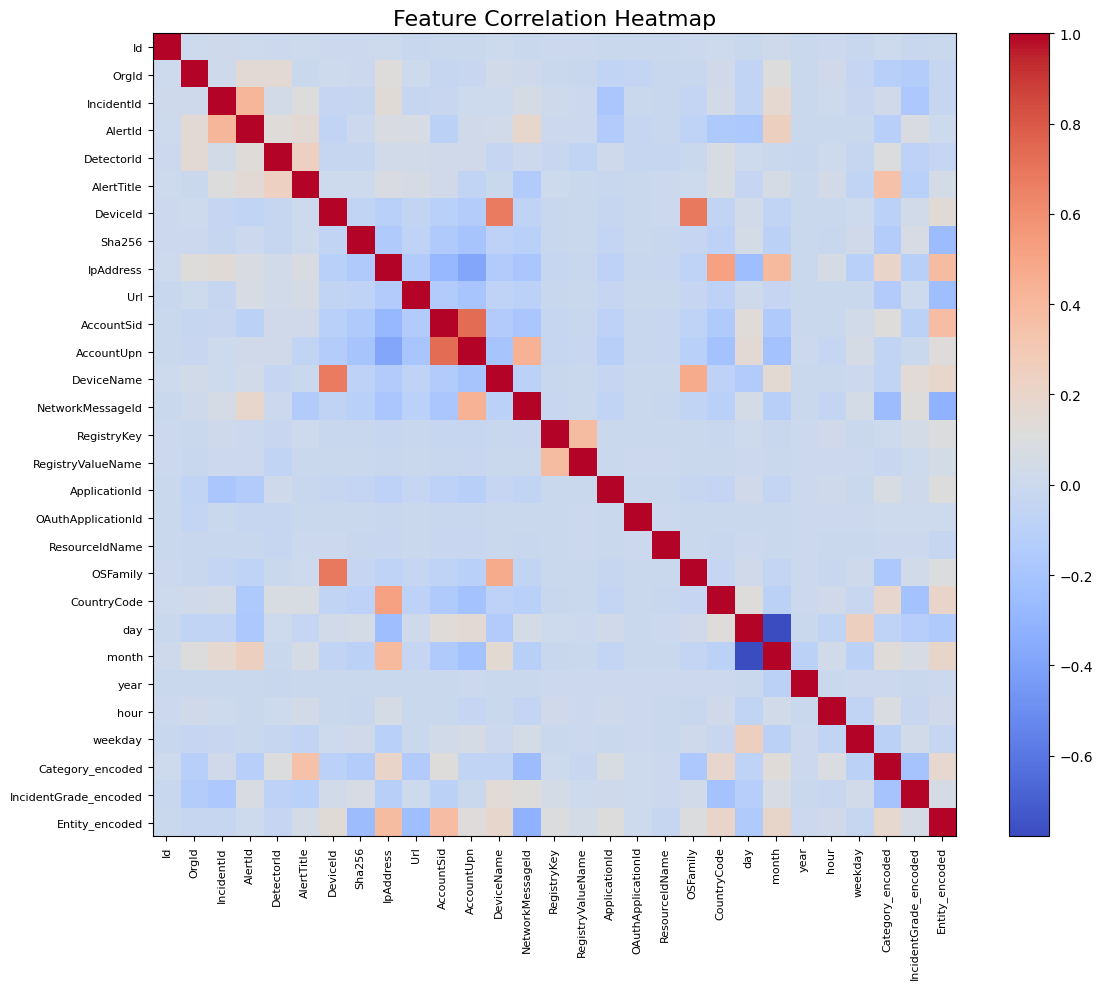

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrix
corr = df.corr()

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the heatmap manually using imshow
cax = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')

# Add colorbar
plt.colorbar(cax, fraction=0.046, pad=0.04)

# Set ticks and labels
ticks = np.arange(0, len(corr.columns), 1)
plt.xticks(ticks, corr.columns, rotation=90, fontsize=8)
plt.yticks(ticks, corr.columns, fontsize=8)

# Add title
plt.title('Feature Correlation Heatmap', fontsize=16)

# Display
plt.tight_layout()
plt.show()


In [34]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'DeviceName', 'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'ApplicationId', 'OAuthApplicationId', 'ResourceIdName', 'OSFamily',
       'CountryCode', 'day', 'month', 'year', 'hour', 'weekday',
       'Category_encoded', 'IncidentGrade_encoded', 'Entity_encoded'],
      dtype='object')

In [35]:
df['Url'].value_counts()

Url
160396    8782791
0            8198
1            6607
2            5264
6            4238
           ...   
141860          1
157647          1
141739          1
108895          1
113074          1
Name: count, Length: 123252, dtype: int64

# Explanation for Removing Specific Columns

The following columns are being removed from the dataset for the reasons outlined below:

1. **Id**:
    - This is a unique identifier for each record and does not provide any meaningful information for analysis or modeling.
    - It is not related to the target variable or any feature relationships.

2. **OrgId**:
    - Represents the organization identifier.
    - While it may provide some context, it is unlikely to contribute significantly to the predictive modeling process and may introduce noise.

3. **IncidentId**:
    - Similar to `Id`, this is a unique identifier for incidents.
    - It does not hold any analytical value and is not useful for feature engineering.

4. **AlertId**:
    - Another unique identifier for alerts.
    - It is not relevant for analysis or modeling as it does not contain any inherent patterns or relationships.

5. **Sha256**:
    - Represents a cryptographic hash of files or data.
    - While it may be useful in specific cybersecurity contexts, it is not meaningful for general analysis or predictive modeling.

6. **IpAddress**:
    - Contains IP addresses, which are unique to specific devices or networks.
    - These values are highly specific and do not generalize well for modeling purposes.

7. **Url**:
    - Represents URLs involved in incidents.
    - URLs are highly specific and do not provide generalizable patterns for analysis.

8. **AccountSid**:
    - A unique identifier for accounts.
    - Similar to other unique identifiers, it does not contribute to feature relationships or predictive modeling.

9. **AccountUpn**:
    - Represents user principal names (UPNs) for accounts.
    - These are unique to individuals and do not provide meaningful patterns for analysis.

10. **DeviceName**:
     - Contains names of devices involved in incidents.
     - Device names are specific to individual systems and do not generalize well for modeling.

11. **NetworkMessageId**:
     - A unique identifier for network messages.
     - It does not provide any analytical value or contribute to feature relationships.

12. **RegistryKey**:
     - Represents specific registry keys in the system.
     - While it may be useful in certain cybersecurity contexts, it is not meaningful for general analysis or predictive modeling.

13. **RegistryValueName**:
     - Contains names of registry values.
     - Similar to `RegistryKey`, it is not relevant for general analysis or modeling.

14. **ApplicationId**:
     - A unique identifier for applications.
     - It does not provide any meaningful information for analysis or modeling.

15. **OAuthApplicationId**:
     - Represents OAuth application identifiers.
     - These are specific to individual applications and do not contribute to generalizable patterns.

16. **ResourceIdName**:
     - Contains names of resources involved in incidents.
     - These are unique to specific resources and do not provide meaningful patterns for analysis.

### Summary
The columns listed above are being removed because they are either:
- Unique identifiers that do not contribute to feature relationships or predictive modeling.
- Highly specific values (e.g., IP addresses, URLs) that do not generalize well.
- Context-specific fields that are not relevant for the broader analysis.

By removing these columns, we reduce noise in the dataset and focus on features that are more likely to contribute to meaningful insights and predictive performance.
```

In [36]:
removable_cols = [
    'Id', 'OrgId', 'IncidentId', 'AlertId', 
    'Sha256', 'IpAddress', 'Url', 
    'AccountSid', 'AccountUpn', 'DeviceName', 
    'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
    'ApplicationId', 'OAuthApplicationId', 'ResourceIdName'
]

In [37]:
df.drop(removable_cols,axis=1,inplace=True)

In [38]:
df.to_csv('final_Training.csv')

In [39]:
df['IncidentGrade_encoded'].value_counts()

IncidentGrade_encoded
1    4110817
2    3322713
0    2031967
Name: count, dtype: int64